In [50]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt

# spacy - need visual studio
# pip install spacy 
# python -m spacy download en
# python -m spacy download en_core_web_lg
import spacy

import seaborn as sns

% matplotlib inline

In [51]:
ROOT_DIR = os.path.dirname(os.path.realpath('__file__'))
IMG_DIR_PATH = os.path.join(ROOT_DIR, '..', 'images')
DATA_PATH = os.path.join(ROOT_DIR, '..', 'data')

script_path = os.path.join(DATA_PATH, 'data.csv')

df = pd.read_csv(script_path, encoding='latin-1')

In [54]:
df.shape

(10517, 14)

In [5]:
nlp = spacy.load('en_core_web_lg')

In [16]:
def get_average_meaning_vector(s):
    doc = nlp(s)
    return np.mean([v.vector for v in doc], axis=0)

In [19]:
average_title_df = df['Title'].apply(get_average_meaning_vector)

In [21]:
average_desc_df = df['Description'].astype(str).apply(get_average_meaning_vector)

In [24]:
average_title_df['Id'] = df['Id']
average_desc_df['Id'] = df['Id']

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [66]:
df_top10.Title

0             300 pushups a day for 20 days!! - Results!!
1                                         John Cena - gym
2              Bodybuilding Motivation - No Time To Waste
3       Most Powerful Home Chest Workout Ever : Build ...
4       Greg Plitt Best of The Best Workout Video Prev...
5       BODYBUILDING MOTIVATION - How Bad Do You Want It?
6       From Game Addicted to Sponsored Athlete: Body ...
7                               Six Pack Abs Core Workout
8       Arnold Schwarzenegger ''Bodybuilders Today Are...
9                     Bodybuilding Motivation - Lifestyle
10                Arnold Schwarzenegger Vs Lou Ferrigno 2
11                          EXTREMELY RIPPED 46 YEAR OLD!
12            Extreme SIX-PACK ABS Workout w/ Kali Muscle
13                  Jeff Seid Transformation 17 years old
14               Home beginner workout for ripped body HD
15               Bodybuilding Motivation - Collapse (MPW)
16                          My Back Workout- Scott Herman
17           F

In [55]:
top_10_percent = df['ViewCount'].nlargest(int(df.shape[0] * 0.1)).iloc[-1]
df['Top10'] = df['ViewCount'] > top_10_percent

In [57]:
df_top10 = df[df['Top10']]
df_bottom10 = df[~df['Top10']]

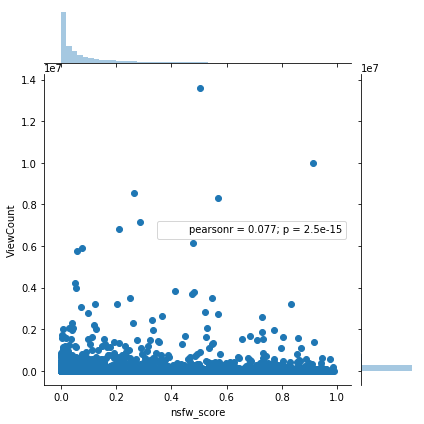

In [60]:
sns.jointplot(df['nsfw_score'], df['ViewCount'])

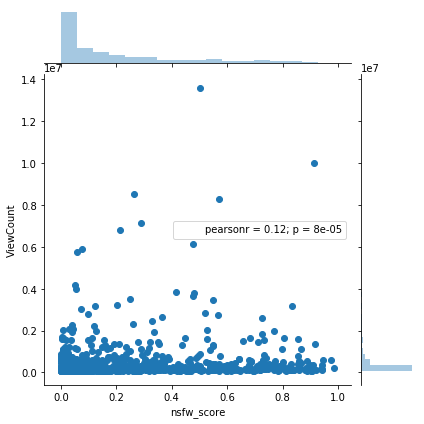

In [61]:
sns.jointplot(df_top10['nsfw_score'], df_top10['ViewCount'])

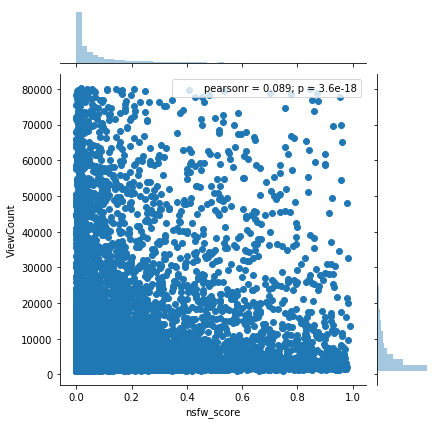

In [62]:
sns.jointplot(df_bottom10['nsfw_score'], df_bottom10['ViewCount'])

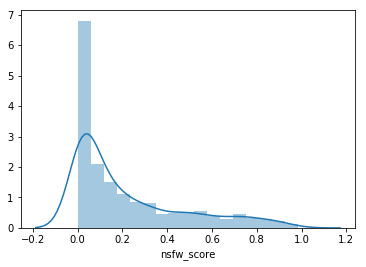

In [58]:
sns.distplot(df_top10['nsfw_score'])

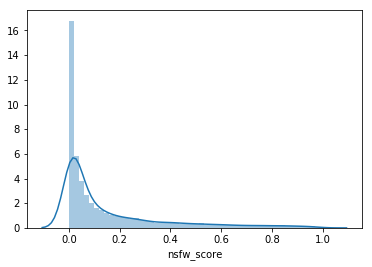

In [59]:
sns.distplot(df_bottom10['nsfw_score'])